# Decision Trees

In [452]:
# Imports
from IPython.display import Image
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder

In [453]:
# Data Import
data = pd.read_csv("./data.csv")
trainColumns = ["age", "income", "student", "creditRating"]
targetColumns = "BuysComputer"

trainData = data[trainColumns]
trainTarget = data[[targetColumns]]

data

,age,income,student,creditRating,BuysComputer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31..40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31..40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [454]:
# Preprocessing Data
le = LabelEncoder()

# Train X
for column in trainColumns:
    le.fit(trainData[column].astype(str))
    trainData[column] = le.transform(trainData[column])

# Train Y
le.fit(trainTarget[targetColumns].astype(str))
trainTarget[targetColumns] = le.transform(trainTarget[targetColumns])

## Teil A
Find some data here [1] on people. The goal is to decide if someone buys a computer or not. Derive the best decision tree by calculating a little by hand (Shannon). At least the first split.

# Aufstellen des Decision Trees

Berechnung der Entropie-Werte für jegliche mögliche erste Klassifizierung (nach age, income, student and credit Rate) ergab folgendes Ergebnis. Die Klassifizierung nach age hat den geringsten Wert und führt zum höchten Information Gain. Deshalb wurde dieser nachfolgend exemplarisch implementiert.

![Berechnung](./calc.png)

In [455]:
# Example Decision Algorithmn
def decision_Tree(input):
    if input[0] == "<=30" and input[2] == "yes":
        print("<=30 and Student -> You buy a Computer.")

    elif input[0] == "31..40":
        print("31..40 -> You buy a Computer.")

    elif input[0] == ">40" and input[1] == "medium" and input[2] == "yes":
        print(">40 and medium income and student -> You buy a Computer.")
    
    elif input[0] == ">40" and input[1] == "low" and input[3] == "fair":
        print(">40 and low income and fair credit Rating -> You buy a Computer.")
    
    else:
        print("You do not buy a Computer.")

In [456]:
# Test Decision Tree Algorithm
testData = [["<=30", "low", "yes", "fair"],
            ["31..40", "medium", "no", "excellent"],
            [">40", "medium", "yes", "excellent"]]

for test in testData:
    decision_Tree(test)

<=30 and Student -> You buy a Computer.
31..40 -> You buy a Computer.
>40 and medium income and student -> You buy a Computer.


## Teil B
Check your tree against the tree derived from SciKit Learn as given in the Python example before! Print the tree with Graphviz.

In [457]:
# Extract Data Columns
X = trainData.values
Y = trainTarget.values

In [458]:
# Generate Classification Tree
tree_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")     # Information Gain
tree_clf.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [459]:
# Export Graph
export_graphviz(
         tree_clf,
         out_file="tree.dot",
         feature_names=trainColumns,
         class_names=["not buying", "buying"],
         rounded=True,
         filled=True)

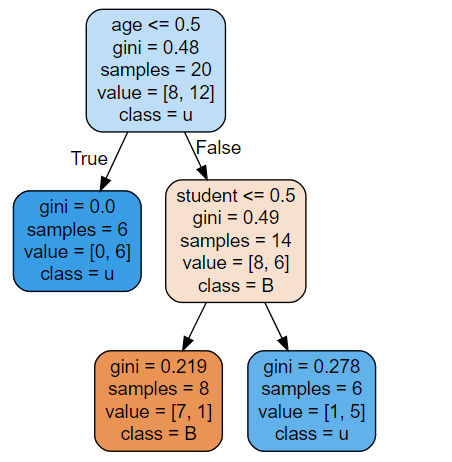

In [460]:
# Graph already exported and then converted by http://www.webgraphviz.com/
Image("graph.png", width=640, height=640)